# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `4`
* Students: `Julien Berger, Jérémy Jayet, Hana Samet, Mathieu Shiva`
* Dataset: `IMDb Films and Crew`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import queue as Q

In [2]:
adjacency =  np.load('./data/adjacency.npy')

adjacency[adjacency <2]=0

n_nodes =  adjacency.shape[0]
n_edges =  np.count_nonzero(adjacency)/2

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [3]:
# We moved the code above

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [4]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.

    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.

    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """

    np.random.seed(seed)

    adjacency = np.zeros((n,n), dtype=float)

    for i in range(1,n):
        for j in range(0,i):
            adjacency[i,j] = (np.random.random()<p)
            adjacency[j,i] = adjacency[i,j]

    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

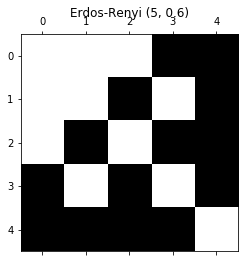

In [5]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

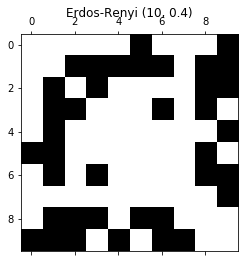

In [6]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [7]:
p = n_edges/((n_nodes*n_nodes/2)-n_nodes)

er = erdos_renyi(n_nodes, p)

The number of nodes is *n_nodes*, given by the size of the first (or the second) dimension of the adjacency matrix. The probability *p* is equal to the number of edges divided by the number of possible edges, formally : $p = \frac{n_{edges}}{\frac{n_{nodes}^2}{2}-n_{nodes}}$

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [8]:
def barabasi_albert(n, m, seed=None, m0=2):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    random.seed(seed)
     # Add m initial nodes (m0 in Lecture) 
    adjacency = np.zeros((n, n), dtype=int)
    
    #start with m0 nodes, with arbitrarily chosen links (with at least one link per node)
    for i in range(m0):
        node=random.randint(1, m0)
        while (node==i):
            node=random.randint(1, m0)
            
        adjacency[i,node]=1
        adjacency[node,i]=1 

    # List of existing nodes, with nodes repeated once for each adjacent edge 
    repeated_nodes=[] 
    #filling the repeated_node with the created m node 
    for i in range(m0):
        tmp=sum(adjacency[i])
        while (tmp>=0):
            repeated_nodes.extend([i]) 
            tmp=tmp-1 
    
    # Start adding the other n-m nodes. The first node is m. 
    source=m0+1 
    #The easiest way of picking nodes with probability proportional to their degree is to maintain a list
    #of node labels where each node appears as many times as its degree is, 
    # and then just pick a random element from the list
    if m0 < m : 
        m=m0 # m should always be smaller or equal to m0
    while source<n: 
        # Now choose m nodes from the existing nodes 
        # Pick uniformly from repeated_nodes (preferential attachement) 
        targets = random.sample(repeated_nodes,m) 
        for i in targets:
            adjacency[i,source]=1
            adjacency[source,i]=1
            repeated_nodes.extend([source]) 
            repeated_nodes.extend([i])
        source += 1
     
    return adjacency

Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

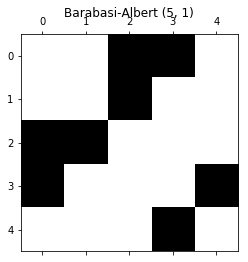

In [9]:
ba = barabasi_albert(5, 1, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

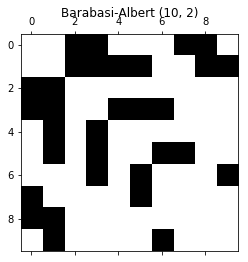

In [10]:
ba = barabasi_albert(10, 2, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

130177
130613.0


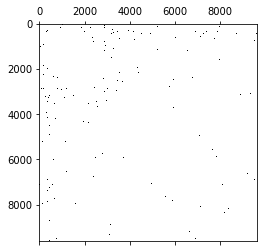

In [11]:
#n_nodes=t+m0
#n_edges=m*t+m0

m0=355 #  arbitrarily 
t=n_nodes-m0
m=int((n_edges-m0)/t)
print(m*t+m0)
print(n_edges)
ba = barabasi_albert(n_nodes, m ,8708,m0)
plt.spy(ba)


**Your answer here**

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [12]:
n_edges_er =  np.count_nonzero(er)/2
n_edges_ba =  np.count_nonzero(ba)/2

print(f'The original network contains {n_edges} edges.')
print(f'The Erdős–Rényi network contains {n_edges_er} edges.') 
print(f'The Barabási-Albert network contains {n_edges_ba} edges.')

The original network contains 130613.0 edges.
The Erdős–Rényi network contains 130254.0 edges.
The Barabási-Albert network contains 129783.0 edges.


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [13]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    kl = 0;
    
    # To deal with p and q of different sizes
    n = np.min([p.shape[0],q.shape[0]])
    
    for i in range(n):
        if q[i] != 0:
            kl = kl + p[i]*np.log(p[i]/q[i])
    
    return kl

In [14]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [15]:
import src.find_components as fcomp

In [16]:
# We need to have a connected graph in order to find the kl divergence.
# As our network is not connected, we use the adjacency matrix of the largest connected component instead

# The first element of the connectedIndices matrix is a vector of length equal to n_nodes
# The value of its elements is 1 if the element is in the largest connected componenent and 0 if it is not
connectedIndices = fcomp.find_components(adjacency)
biggestComponentSize = np.amax(np.sum(connectedIndices, axis=1))

# get the adjacency matrix of the largest connected component of our network
indx=np.array(range(n_nodes),dtype=int)
indx=connectedIndices[0].astype(int)*indx
indx_without_zeros=np.unique(indx)

# take the unweighted version of the adjacency matrix
Biggest_component=adjacency[indx_without_zeros,:][:,indx_without_zeros]
Biggest_component[Biggest_component!=0]=1


In [17]:
#Take the normalized degree distribution for the largest connected component 
#of the original graph and for the ER graph
degree_er = np.sum(er, axis=0)
degree_er = degree_er/sum(degree_er)

degree_biggest = np.sum(Biggest_component, axis=0)
degree_biggest=degree_biggest/sum(degree_biggest)

kl_divergence(degree_biggest,degree_er)

0.6210372874703232

In [18]:
#Take the normalized degree distribution for BA graph
degree_ba = np.sum(ba, axis=0)
degree_ba=degree_ba/sum(degree_ba)

kl_divergence(degree_biggest,degree_ba)

0.6647073637059798

In [19]:
#Kl divergence between the two random graphs
kl_divergence(degree_er,degree_ba)

0.18120076813509908

### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

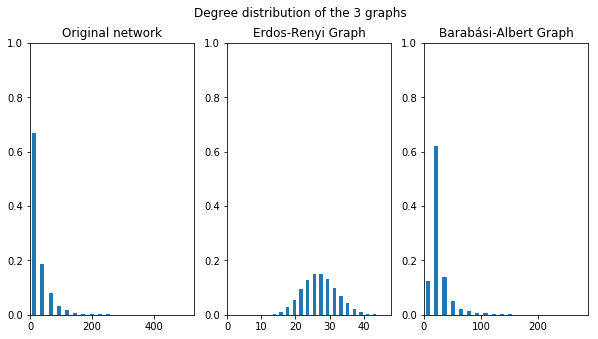

In [20]:
#The histogram of our original network

# we use the unweighted adjacency matrix
unweighted_adjacency=adjacency
unweighted_adjacency[unweighted_adjacency != 0] = 1;
degree = np.sum(unweighted_adjacency, axis=0);
weights = np.ones_like(degree) / float(n_nodes)
#plt.hist(degree, weights=weights, rwidth=.5);

#The histogram of the Erdos-Renyi graph
degree_er = np.sum(er, axis=0);
weights = np.ones_like(degree_er) / float(n_nodes)
#plt.hist(degree_er, weights=weights, rwidth=.5);

#The histogram of the Barabási-Albert graph
degree_ba = np.sum(ba, axis=0);
weights = np.ones_like(degree_ba) / float(n_nodes)
#plt.hist(degree_ba, weights=weights, rwidth=.5);

plt.figure(figsize=(10, 5))
plt.subplot(131);
plt.hist(degree, weights=weights, bins=20, rwidth=.5);
plt.title('Original network');
plt.axis([0,degree.max(),0,1])

plt.subplot(132);
plt.hist(degree_er, weights=weights, bins=20, rwidth=.5);
plt.title('Erdos-Renyi Graph');
plt.axis([0,degree_er.max(),0,1])

plt.subplot(133);
plt.hist(degree_ba, weights=weights,bins=20,  rwidth=.5);
plt.title('Barabási-Albert Graph');
plt.axis([0,degree_ba.max(),0,1])

plt.suptitle('Degree distribution of the 3 graphs')
plt.show()

**Your answer here.**

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Your answer here.**

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [21]:
import networkx as nx

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Your answer here.**

### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [22]:
def random_actor_network_model(n, m, std, seed=None, m0=2):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    random.seed(seed)
    # Add m initial nodes (m0 in Lecture) 
    adjacency = np.zeros((n, n), dtype=int)
    
    #start with m0 nodes, with arbitrarily chosen links (with at least one link per node)
    for i in range(m0):
        node=random.randint(1, m0)
        while (node==i):
            node=random.randint(1, m0)
            
        adjacency[i,node]=1
        adjacency[node,i]=1 

    # List of existing nodes, with nodes repeated once for each adjacent edge 
    repeated_nodes=[] 
    #filling the repeated_node with the created m node 
    for i in range(m0):
        tmp=sum(adjacency[i])
        while (tmp>=0):
            repeated_nodes.extend([i]) 
            tmp=tmp-1 
    
    # Start adding the other n-m nodes. The first node is m. 
    source=m0+1 
    #The easiest way of picking nodes with probability proportional to their degree is to maintain a list
    #of node labels where each node appears as many times as its degree is, 
    # and then just pick a random element from the list
    if m0 < m : 
        m=m0 # m should always be smaller or equal to m0
    while source<n:
        
        # Choose a number of node from a normal distribution with a certain standard deviation
        mLinksForAddedNode = int(np.around(np.random.normal(m,std)))
        
        # To avoid to ask for a negative number of samples
        if mLinksForAddedNode < 1 :
            mLinksForAddedNode = 0
        
        # Now choose m nodes from the existing nodes 
        # Pick uniformly from repeated_nodes (preferential attachement) 
        targets = np.random.choice(repeated_nodes,mLinksForAddedNode) 
        for i in targets:
            adjacency[i,source]=1
            adjacency[source,i]=1
            repeated_nodes.extend([source]) 
            repeated_nodes.extend([i])
        source += 1
     
    return adjacency


#############################################################################################################

# Create the network
std = 12 # We chose this value by iteration. We started with std=5 and went to std=14. We kept the best value.

an = random_actor_network_model(n_nodes, m, std,8708,m0)

### Question 13

Check the properties you expected to be similar, and compare to your network.

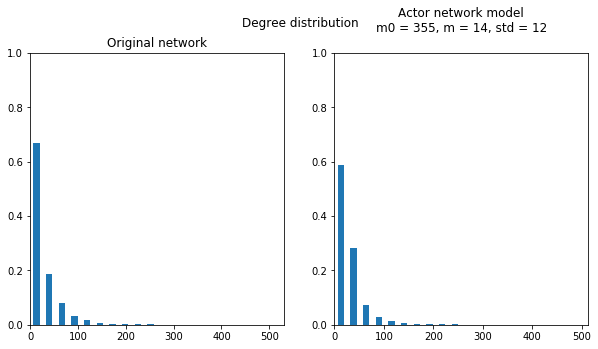

The original network contains 130613.0 edges.
The actor network model contains 135858.0 edges.

The biggest component of the model has a size of 8385.0.In comparison, the biggest component of the original graph has a size of 9276.0 

The KL divergence between the original network and the model is 0.8626031022816716


In [23]:
#The histogram of the actor network model graph
degree_an = np.sum(an, axis=0);
weights = np.ones_like(degree_an) / float(n_nodes)

plt.figure(figsize=(10, 5))
plt.subplot(121);
plt.hist(degree, weights=weights, bins=20, rwidth=.5);
plt.title('Original network');
plt.axis([0,degree.max(),0,1])

plt.subplot(122);
plt.hist(degree_an, weights=weights,bins=20,  rwidth=.5);
plt.title(f'Actor network model\nm0 = {m0}, m = {m}, std = {std}\n');
plt.axis([0,degree_an.max(),0,1])

plt.suptitle(f'Degree distribution\n\n')

plt.show()

n_edges_an =  np.count_nonzero(an)/2

print(f'The original network contains {n_edges} edges.\nThe actor network model contains {n_edges_an} edges.\n')

# We need to have a connected graph in order to find the kl divergence.
# The model is not connected, we will find the largest connected component

# The first element of the connectedIndices matrix is a vector of length equal to n_nodes
# The value of its elements is 1 if the element is in the largest connected component and 0 if it is not
connectedIndicesAn = fcomp.find_components(an)
biggestComponentSizeAn = np.amax(np.sum(connectedIndicesAn, axis=1))

print(f'The biggest component of the model has a size of {biggestComponentSizeAn}.\
In comparison, the biggest component of the original graph has a size of {biggestComponentSize} \n')

# get the adjacency matrix of the largest connected component of our network
indx=np.array(range(n_nodes),dtype=int)
indx=connectedIndicesAn[0].astype(int)*indx
indx_without_zeros=np.unique(indx)

# take the unweighted version of the adjacency matrix
BiggestComponentAn = adjacency[indx_without_zeros,:][:,indx_without_zeros]
BiggestComponentAn[BiggestComponentAn != 0] = 1

degreeBiggestAn = np.sum(BiggestComponentAn, axis=0)
degreeBiggestAn=degreeBiggestAn/sum(degreeBiggestAn)

#np.min(degreeBiggestAn)

divergence = kl_divergence(degree_biggest,degreeBiggestAn)

print(f'The KL divergence between the original network and the model is {divergence}')


Are the results what you expected? Explain.

**Your answer here.**

### To be modified :

3 different degree distibution, for 3 values of std.

![std = 8](assets/anm_degree_distrib_std=8.png)

![std = 10](assets/anm_degree_distrib_std=10.png)

![std = 12](assets/anm_degree_distrib_std=12.png)

![std = 14](assets/anm_degree_distrib_std=14.png)